# Критерии успешности игр

**Данные:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Примечание: данные за 2016 год могут быть неполными.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования** — выявить определяющие успешность игры закономерности и проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования:**

Данные об играх находятся в файле games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. Потом будет сделана преобработка: чистка данных от пропусков, дубликатов и стилевых неточностей. После этого я проведу исследовательский анализ данных и посмотрю сегментно на пользователей разных регионов. В конце проверю гипотезы и напишу общий вывод.

Исследование пройдёт в несколько этапов:

- Импорт библиотек.
- Общая информация о данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Портрет пользователя каждого региона.
- Проверка гипотез.
- Вывод.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Общая информация о данных

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


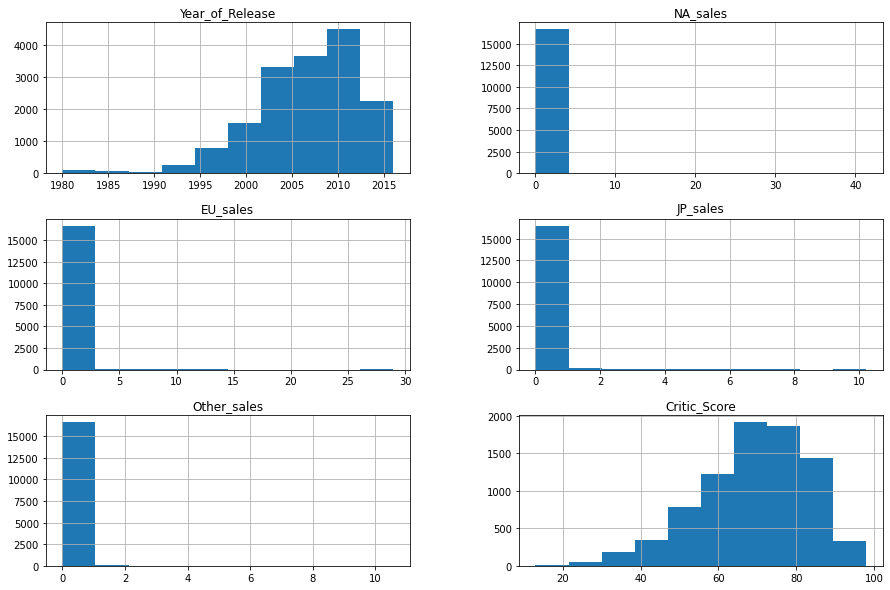

In [5]:
data.hist(figsize=(15, 10));

**Вывод по общей информации о данных:** в датасете есть пропуски, также возможны аномалии и дубли, выяснится в процессе предобработки. Тип данных с годом нужно изменить на Int, возможно, надо изменить данные также в Critic_Score и User_Score, это станет понятно в процессе предобработки.

## Предобработка данных

### Замена названия столбцов

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Надо привести все названия колонок к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()
data.columns #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

In [8]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Надо проверить эти столбцы:
- year_of_release
- critic_score
- user_score

In [9]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Надо перевести в int, так как есть NaN, перевести просто в int не удастся, поэтому переведу в Int64.

In [11]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Надо перевести эту колонку в формат float, также заранее надо убрать значение "tbd" - оно не имеет практической ценности, его надо заменить на NaN.

TBD - значит, не определено. Для меня это примерно то же самое, что и пропуск.

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan #замена значений tbd на nan

In [14]:
data['user_score'] = data['user_score'].astype('float') #перевод user_score в формат float

### Обработка пропусков

In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
print(f'Всего в данных {data.platform.count()} строк')

print(f'Пропусков в колонке "name" {(data.platform.count() - data.name.count()) / data.platform.count():.3%} от общего количества строк')
print(f'Пропусков в колонке "year_of_release" {(data.platform.count() - data.year_of_release.count()) / data.platform.count():.3%} от общего количества строк')
print(f'Пропусков в колонке "genre" {(data.platform.count() - data.genre.count()) / data.platform.count():.3%} от общего количества строк')
print(f'Пропусков в колонке "critic_score" {(data.platform.count() - data.critic_score.count()) / data.platform.count():.3%} от общего количества строк')
print(f'Пропусков в колонке "user_score" {(data.platform.count() - data.user_score.count()) / data.platform.count():.3%} от общего количества строк')
print(f'Пропусков в колонке "rating" {(data.platform.count() - data.rating.count()) / data.platform.count():.3%} от общего количества строк')

Всего в данных 16715 строк
Пропусков в колонке "name" 0.012% от общего количества строк
Пропусков в колонке "year_of_release" 1.609% от общего количества строк
Пропусков в колонке "genre" 0.012% от общего количества строк
Пропусков в колонке "critic_score" 51.319% от общего количества строк
Пропусков в колонке "user_score" 54.592% от общего количества строк
Пропусков в колонке "rating" 40.479% от общего количества строк


Можно удалить строки с пропусками в колонках name, year_of_release, genre - это меньше 2% от данных.
Пропусков в остальных колонках много. 

Считаю нецелесообразным заполнение оценки критиков и пользователей медианой, потому что это исказит статистику, а также невозможно точно предсказать, какие оценки были бы у игры. У меня нет оснований считать, что между каким-либо показателем (например жанром) и оценками есть взаимосвязь.

Пропуски в колонке rating я заменю на слово "Unknown".

In [17]:
print('Было', len(data), 'строк')
data = data.dropna(subset=['name', 'year_of_release', 'genre']) #удаление NaN
print('Стало', len(data), 'строк')

Было 16715 строк
Стало 16444 строк


In [18]:
data['rating'] = data['rating'].fillna('Unknown') #заглушка для пропусков в колонке rating

In [19]:
data.isna().sum() #результат работы с NaN

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Столбец с суммарными продажами

In [20]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data.head() #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Unknown,31.38


### Поиск дубликатов и аномальных значений (выбросов)

In [22]:
data.duplicated().sum()

0

In [23]:
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [24]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов нет, неявных дубликатов в названиях платформ и жанров тоже.

Поиск редко встречающихся значений по общему количеству продаж:

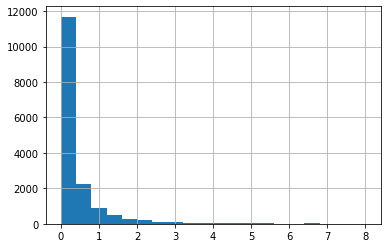

In [25]:
data.total_sale.hist(range=(0,8), bins=20);

Проверю, сколько строк с total_sales > 3 миллионов копий:

In [26]:
print(round(len(data.query('total_sale > 3')) / len(data) * 100, 2), '% от общего количества строк')

2.85 % от общего количества строк


Посчитаю это выбросами и удалю из датасета:

In [27]:
new_data = data.query('total_sale <= 3')

In [28]:
print('Доля оставшихся данных', round(new_data.shape[0] / data.shape[0],2) * 100, '%')

Доля оставшихся данных 97.0 %


**Вывод по предобработке данных:** заменены пропуски там, где это было возможно. Выявлены и удалены выбросы, изменен тип данных в некоторых столбцах. Также добавлен столбец с общими продажами по каждой строке.

## Исследовательский анализ данных

### Количество игр по годам

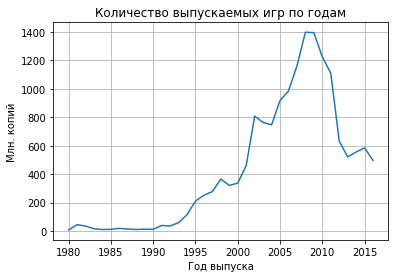

In [29]:
new_data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(title='Количество выпускаемых игр по годам', grid=True, xlabel='Год выпуска', ylabel='Млн. копий', legend=False);

Немного укрупню часть графика:

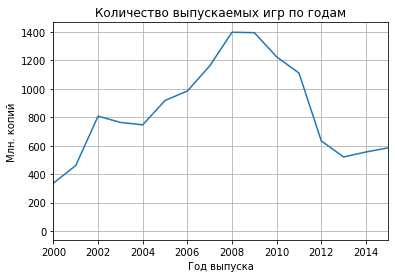

In [30]:
new_data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(title='Количество выпускаемых игр по годам', grid=True, xlim=(2000,2015), \
      xlabel='Год выпуска', ylabel='Млн. копий', legend=False);

**Вывод:** больше всего игр выпускалось в 2008 и 2009 годах, меньше всего до 1995 года. Теоретически не все периоды важны, сейчас я бы отбросила данные до 1995 года, но так как далее я буду делать срез данных более актуальный, для 2017 года, я отброшу данные позже. Сейчас анализирую все данные, которые есть.

### Продажи на разных платформах

Платформы, отсортированные по общему количеству продаж (от большего к меньшему) - топ 10:

In [31]:
new_data.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False).head(10)

,total_sale
platform,
PS2,884.30
PS3,611.37
X360,588.82
PS,505.92
DS,496.06
Wii,460.06
GBA,254.25
PSP,245.24
XB,233.64


Больше всего продаж на платформах PS2, PS3, X360, PS, DS. Посмотрю распределение отдельно по этим платформам:

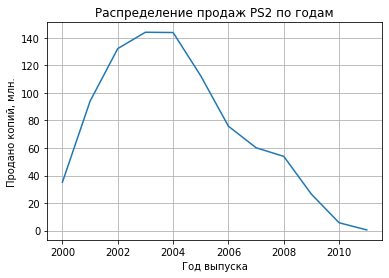

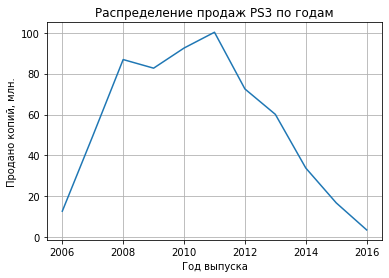

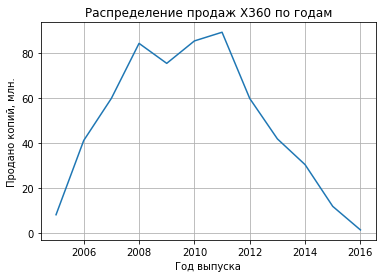

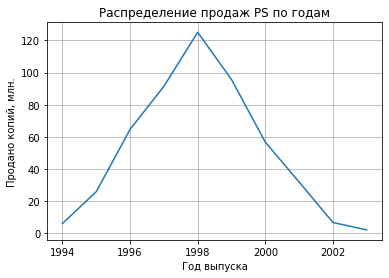

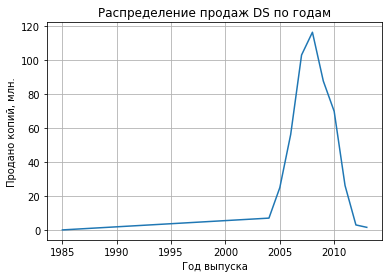

In [32]:
new_data.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PS2 по годам');
new_data.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PS3 по годам');
new_data.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж X360 по годам');
new_data.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PS по годам');
new_data.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж DS по годам');

На всех графиках есть явный пик/пики и падение. В среднем по продажам пик на 100-140 миллионах копий. На всех графиках продажи в итоге падают.

**Вывод:** в среднем срок выживаемости платформы - 10 лет. Пик продаж приходится обычно на 4-6 лет с момента ее выхода.

### Срез данных для построения прогноза на 2017 год

Для прогноза я выбрала период 4 года (2013-2016). Так как к данным было примечание о том, что за 2016 год данные могут быть неполными, будем считать, что анализировать я буду данные за примерно 3,5 года.

In [33]:
new_data = new_data.query('year_of_release >= 2013')

In [34]:
print('Доля оставшихся данных:', round(len(new_data) / len(data), 2))

Доля оставшихся данных: 0.13


**Вывод:** данных осталось не так много, но отрезанные данные не помогут составить прогноз, потому что они неактуальны на 2017 год.

### Какие платформы потенциально прибыльные для 2017 года

Посчитаю топ-10 по платформам в зависимости от общих продаж в новом срезе данных:

In [35]:
new_data.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False).head(10)

,total_sale
platform,
PS4,160.47
PS3,114.36
XOne,112.20
X360,85.81
3DS,72.39
WiiU,40.70
PC,36.38
PSV,32.99
Wii,10.08


Построю отдельные графики, чтобы наглядно увидеть распределение и сделать выводы:

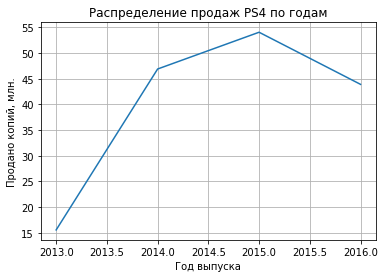

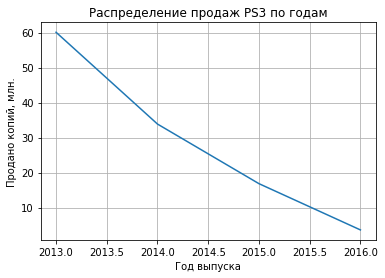

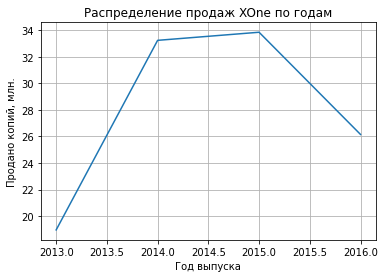

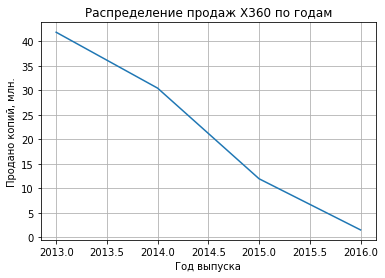

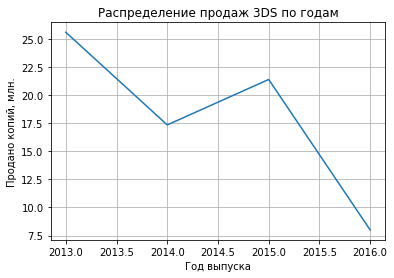

In [36]:
new_data.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PS4 по годам');
new_data.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PS3 по годам');
new_data.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж XOne по годам');
new_data.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж X360 по годам');
new_data.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж 3DS по годам');

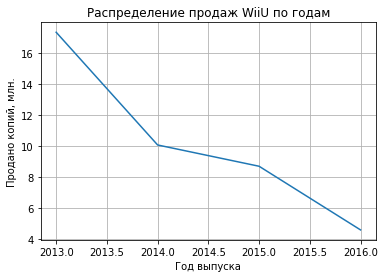

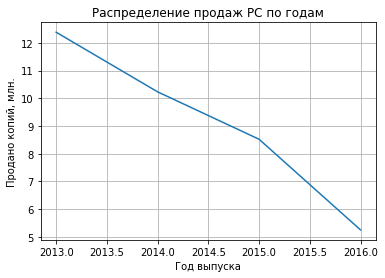

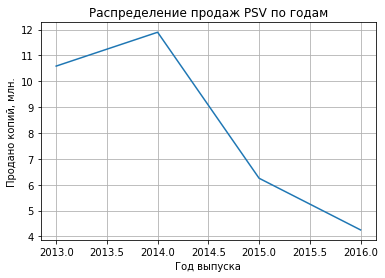

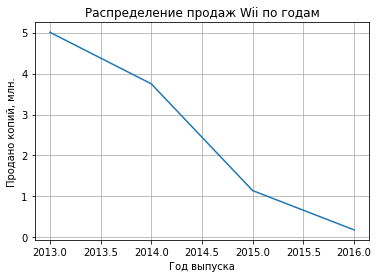

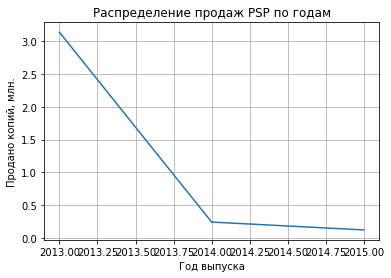

In [37]:
new_data.query('platform == "WiiU"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж WiiU по годам');
new_data.query('platform == "PC"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PC по годам');
new_data.query('platform == "PSV"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PSV по годам');
new_data.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж Wii по годам');
new_data.query('platform == "PSP"').pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, xlabel='Год выпуска', ylabel='Продано копий, млн.', legend=False, title='Распределение продаж PSP по годам');

Продажи падают на всех графиках. Лучше анализировать по пикам.
Пики есть у:
- PS4 в 2015 году - подходит.
- XOne - в 2014 и 2015, подходит.
- 3DS - в 2015. Подойдет.
- PSV - в 2014 году, может подойти. Но малый объем продаж, поэтому не буду учитывать.

У остальных платформ нисходящий график.

**Вывод:** самые перспективные и потенциально прибыльные платформы для 2017 года: PS4, XOne, 3DS.

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам

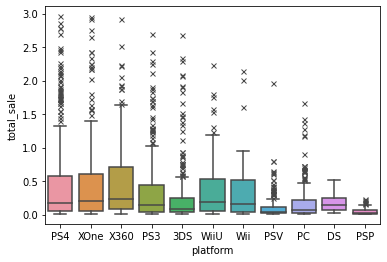

In [38]:
sns.boxplot(x='platform', y='total_sale', data=new_data, flierprops={"marker": "x"});

Укрупнение графика:

(0.0, 0.75)

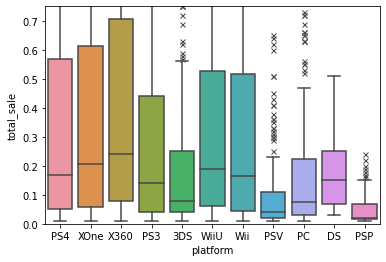

In [39]:
sns.boxplot(x='platform', y='total_sale', data=new_data, flierprops={"marker": "x"});
plt.ylim(0, 0.75)

**Вывод:** Нормальные значения в пределах 1.7 миллионов копий, есть выбросы. Медиана всех платформ не доходит до 0.3 миллионов. Самое большое значение третьего квартиля у платформы X360, самое небольшое - у PSP.

### Диаграмма рассеяния и коэффициент корреляции Пирсона между отзывами и продажами на PS4

Для расчетов я решила взять одну из самых перспективных платформ для 2017 года - PS4. На ее основе я проанализирую зависимость между отзывами пользователей и критиков и глобальными продажами.

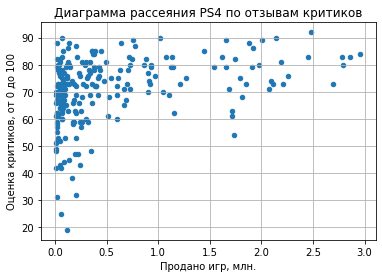

In [40]:
new_data.query('platform == "PS4"').plot(x='total_sale', y='critic_score', kind='scatter', \
                                         title='Диаграмма рассеяния PS4 по отзывам критиков', xlabel='Продано игр, млн.',\
                                        ylabel='Оценка критиков, от 0 до 100', grid=True);

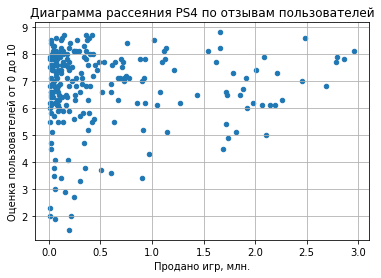

In [41]:
new_data.query('platform == "PS4"').plot(x='total_sale', y='user_score', kind='scatter', \
                                         title='Диаграмма рассеяния PS4 по отзывам пользователей', xlabel='Продано игр, млн.',\
                                        ylabel='Оценка пользователей от 0 до 10', grid=True);

In [42]:
print('Корреляция между отзывами критиков и продажами:', new_data.query('platform == "PS4"').critic_score.astype(float).corr(new_data.total_sale))
#так как с форматом Int у critic_score метод выдавал ошибку, пришлось перевести колонку в формат "float"

Корреляция между отзывами критиков и продажами: 0.3467956318318517


In [43]:
print('Корреляция между отзывами пользователей и продажами:', new_data.query('platform == "PS4"').user_score.corr(new_data.total_sale))

Корреляция между отзывами пользователей и продажами: 0.041047730176119464


**Вывод:** По диаграммам рассеяния видно, что у игр с большим объемом продаж не встречаются оценки критиков ниже 50 и оценки пользователей ниже 4.

Большое количество оценок у игр с объемом продаж до 0.5 миллионов копий. График с отзывами критиков визуально напоминает график с отзывами пользователей.

По корреляции видно, что у отзывов критиков и глобальных продаж есть слабая прямая линейная связь.
Хотя между отзывами пользователей и продажами зависимость не выявлена.

#### Вывод по всем платформам (отзывы критиков и пользователей)

Я выбрала 5 платформ: XOne, 3DS, X360, WiiU, PS3.

##### Отзывы критиков

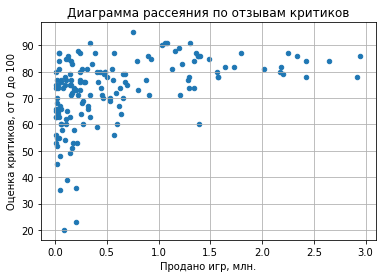

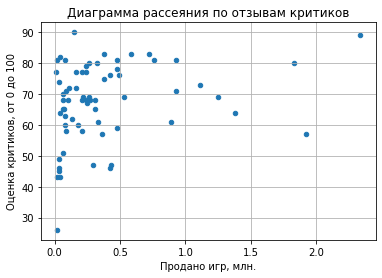

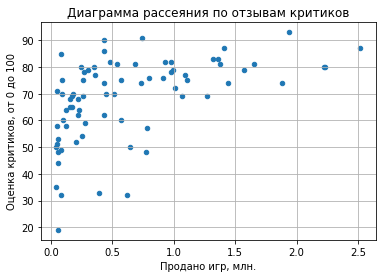

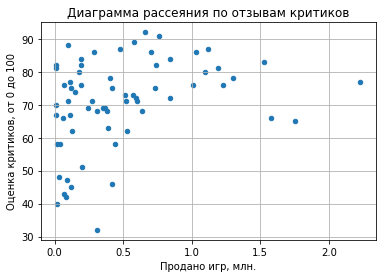

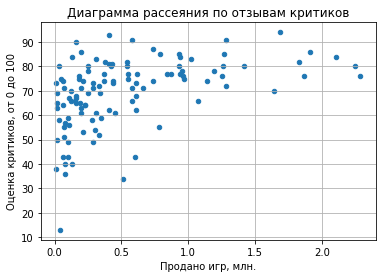

In [44]:
platforms = ['XOne', '3DS', 'X360', 'WiiU', 'PS3']
for index in platforms:
    new_data[new_data['platform'] == index].plot(x='total_sale', y='critic_score', kind='scatter', \
                                         title='Диаграмма рассеяния по отзывам критиков', xlabel='Продано игр, млн.',\
                                        ylabel='Оценка критиков, от 0 до 100', grid=True)

In [45]:
for index in platforms:
    print('Корреляция между отзывами критиков и продажами:', new_data[new_data['platform'] == index].critic_score.astype(float).corr(new_data.total_sale))

Корреляция между отзывами критиков и продажами: 0.4323893399174595
Корреляция между отзывами критиков и продажами: 0.2584800739716679
Корреляция между отзывами критиков и продажами: 0.50266169546246
Корреляция между отзывами критиков и продажами: 0.3362167347624872
Корреляция между отзывами критиков и продажами: 0.4588792939137831


**Вывод по отзывам критиков на других платформах:** ситуация похожа с ситуацией на PS4 - есть не очень прочная линейная связь. По диаграммам рассеяния видно, что у игр с большим объемом продаж не встречаются оценки критиков ниже 50.

Большое количество оценок у игр с объемом продаж до 1 миллионов копий.

##### Отзывы пользователей

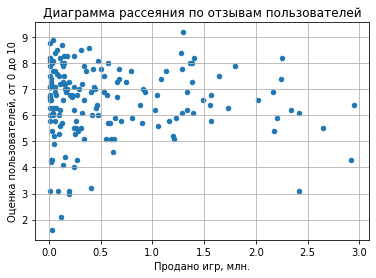

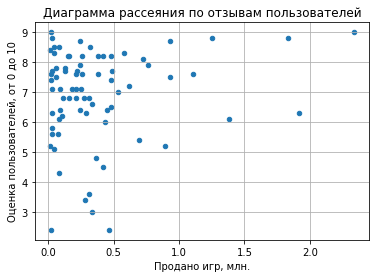

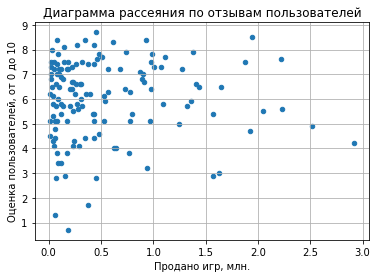

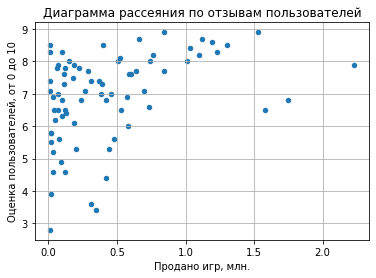

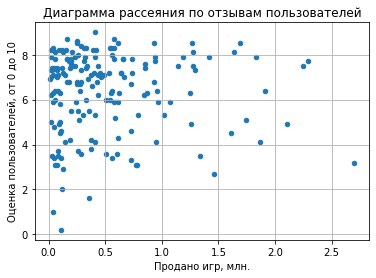

In [46]:
for index in platforms:
    new_data[new_data['platform'] == index].plot(x='total_sale', y='user_score', kind='scatter', \
                                         title='Диаграмма рассеяния по отзывам пользователей', xlabel='Продано игр, млн.',\
                                        ylabel='Оценка пользователей, от 0 до 10', grid=True)

In [47]:
for index in platforms:
    print('Корреляция между отзывами пользователей и продажами:', new_data[new_data['platform'] == index].user_score.corr(new_data.total_sale))

Корреляция между отзывами пользователей и продажами: -0.03817104557217298
Корреляция между отзывами пользователей и продажами: 0.15370920169229801
Корреляция между отзывами пользователей и продажами: 0.013081375757118452
Корреляция между отзывами пользователей и продажами: 0.3951116421013769
Корреляция между отзывами пользователей и продажами: -0.0038383813529215523


**Вывод по отзывам пользователей на других платформах:** графики похожи визуально на график PS4. По коэффициенту корреляции видно, что чаще всего связи практически нет. Выделяется только платформа WiiU, но она не очень актуальна, ее показатель не похож на все остальные.

Большое количество оценок у игр с объемом продаж до 0.5 миллионов копий.

**Общий вывод по отзывам пользователей и критиков:** все диаграммы имеют похожий рисунок, корреляция разных платформ также похожа. Отзывы в целом слабо влияют на успешность игр, нет сильной линейной зависимостью между продажами и отзывами. При этом линейная зависимость между продажами и отзывами критиков выражена сильнее, чем между продажами и отзывами пользователей.

### Распределение игр по жанрам

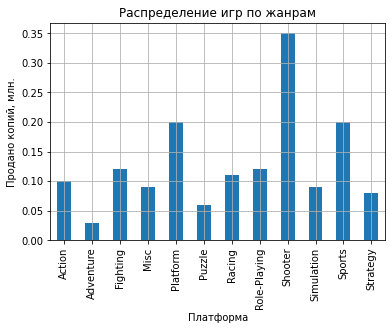

In [48]:
new_data.pivot_table(index='genre', values='total_sale', aggfunc='median').plot(kind='bar', grid=True, xlabel='Платформа', ylabel='Продано копий, млн.', legend=False, title='Распределение игр по жанрам');

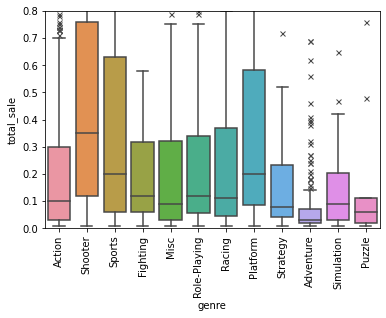

In [49]:
sns.boxplot(x='genre', y='total_sale', data=new_data, flierprops={"marker": "x"});
plt.ylim(0, 0.8)
plt.xticks(rotation=90);

**Самые прибыльные жанры:**
1. Shooter
2. Sports
3. Platform
4. Fighting
5. Role-Playing

**Также выделяются жанры с низкими продажами:**
1. Adventure
1. Puzzle
3. Strategy

**Вывод:** самые прибыльные жанры (топ-3): Shooter, Sports и Platform. Самые неприбыльные: Adventure, Puzzle, Strategy.

## Портрет пользователя каждого региона

### Регион North America

#### Самые популярные платформы (топ-5) в Северной Америке

In [50]:
new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
XOne,65.35
PS4,57.27
X360,51.83
PS3,41.67
WiiU,18.63


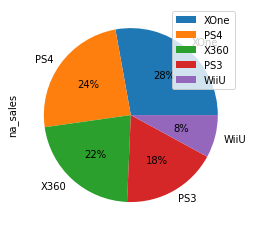

In [51]:
new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='pie', subplots=True, autopct='%1.0f%%');

Как видно на таблице, самые прибыльные платформы - XBOX и PS. XBOX более популярен, чем PS. X360 и XOne занимают в среднем 50% от общего объема, 42% - PS. Остальные 8% - WiiU.

#### Самые популярные жанры (топ-5) в Северной Америке

In [52]:
new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
Action,81.25
Sports,54.08
Shooter,45.81
Role-Playing,26.96
Misc,16.40


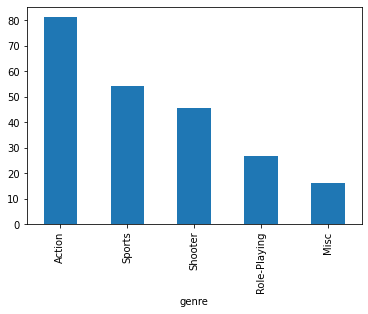

In [53]:
new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='bar', legend=False);

Популярнее всего жанры:
1. Action
2. Sports
3. Shooter
4. Role-Playing
5. Misc (смешанный жанр)

#### Влияние рейтинга ESRB на продажи

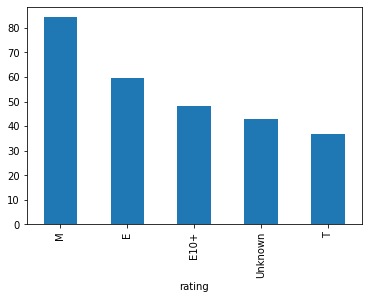

In [54]:
new_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='bar', legend=False);

Да, влияние рейтинга есть. Как видно из столбчатой диаграммы, больше всего игр покупают с категорией М - для взрослых. На втором и третьем месте: Е- для всех, Е10+ - для всех от 10 лет.

### Регион European Union

#### Самые популярные платформы (топ-5) в Европейском Союзе

In [55]:
new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,67.22
XOne,36.60
PS3,36.58
X360,26.05
PC,23.54


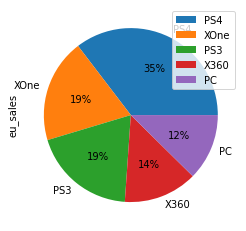

In [56]:
new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='pie', subplots=True, autopct='%1.0f%%');

Самые прибыльные платформы - XBOX и PS. PS более популярна, чем XBOX. PS3 и PS4 занимают в среднем 55% от общего объема, примерно 35% - XBox. Остальные % - PC.

#### Самые популярные жанры (топ-5) в Европейском Союзе

In [57]:
new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,74.20
Shooter,38.15
Sports,29.24
Role-Playing,20.64
Racing,16.37


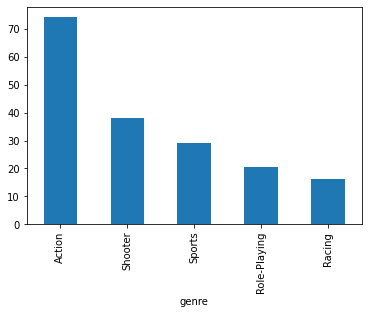

In [58]:
new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', legend=False);

Популярнее всего те же самые жанры, которые в общем были объемными:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

#### Влияние рейтинга ESRB на продажи

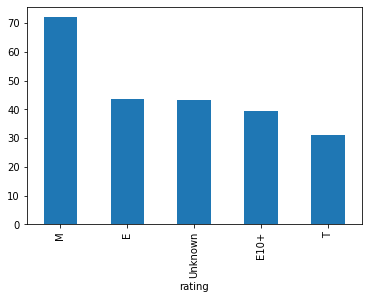

In [59]:
new_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', legend=False);

Покупают много игр с рейтингом М. Также Е, Е10+ и Т. М - взрослые, Е - для всех, Е10+ - для всех от 10 лет, Т - для подростков.

Еще есть рейтинг "Unknown", но по нему у нас нет информации.

### Регион Japan

#### Самые популярные платформы (топ-5) в Японии

In [60]:
new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,38.77
PS3,20.61
PSV,18.59
PS4,11.74
WiiU,5.66


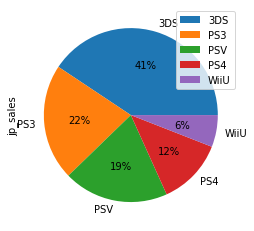

In [61]:
new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='pie', subplots=True, autopct='%1.0f%%');

Самые прибыльные платформы - 3DS и PS3. 3DS нигде раньше не встречалась, а здесь она занимает лидирующие позиции. В среднем 55% японцев предпочитают Sony, 40% - Nintendo, оставшиеся % - WiiU. В XBOX японцы вообще не любят играть, в отличие от жителей Северной Америки.

#### Самые популярные жанры (топ-5) в Японии

In [62]:
new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Action,33.29
Role-Playing,31.61
Misc,9.04
Adventure,5.82
Sports,4.96


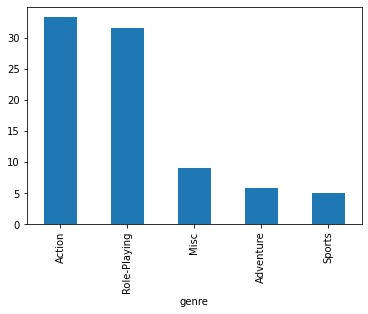

In [63]:
new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', legend=False);

Популярнее всего:
1. Action
2. Role-PLaying
3. Misc
4. Adventure
5. Sports

#### Влияние рейтинга ESRB на продажи

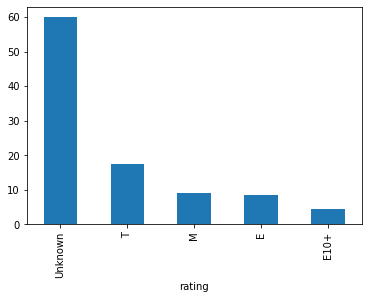

In [64]:
new_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', legend=False);

В Японии четко прослеживается преобладающий рейтинг - Unknown, но для нас это ни о чем не говорит, так как у игр нет рейтинга. На втором и третьем месте Т и М.

## Проверка гипотез

### Гипотеза №1

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC разные.

In [65]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(new_data.query('platform == "XOne" and user_score.notna()')['user_score'], new_data.query('platform == "PC" and user_score.notna()')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1334030549086833
Не получилось отвергнуть нулевую гипотезу


Я выбрала такое значение нулевой гипотезы, потому что оно было указано в задании как гипотеза на проверку. Все остальные варианты я учла в альтернативной гипотезе. Я выбрала метод сравнения среднего по двум выборкам, так как за счет укрупнения и фильтрации я выбираю данные из общей совокупности данных.

### Гипотеза №2

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports разные.

In [66]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(new_data.query('genre == "Action" and user_score.notna()')['user_score'], new_data.query('genre == "Sports" and user_score.notna()')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.331244429550656e-25
Отвергаем нулевую гипотезу


Я выбрала такое значение нулевой гипотезы, потому что при сравнении двух выборок мы считаем, насколько похожи средние значения. Все остальные варианты я учла в альтернативной гипотезе. Я выбрала метод сравнения среднего по двум выборкам, так как за счет укрупнения и фильтрации я выбираю данные из общей совокупности данных.

## Общий вывод:

**В рамках исследовательского анализа было выявлено:**
1. Больше всего игр было выпущено в 2008-2009 годах.
2. По всей совокупности данных с 1980 по 2016 год лидерами по продажам стали платформы PS2, PS3, X360, PS, DS.
3. На всех графиках платформ есть явный пик/пики и падение. В среднем по продажам пик на 100-140 миллионах копий. На всех графиках продажи в итоге падают.
4. Срок жизни платформы - в среднем 10 лет.
5. Потенциально прибыльные платформы для 2017 года: PS4, XOne, 3DS.
6. Диаграмма размаха с разбивкой по платформам показывает, нормальные значения в пределах 1.7 миллионов копий, есть выбросы. Медиана всех платформ не доходит до 0.3 миллионов. Самое большое значение третьего квартиля у платформы X360, самое небольшое - у PSP.
7. Диаграммы рассеяния и коэффициенты корреляции отзывов пользователей и критиков по платформе PS4 показывают, что у игр с большим объемом продаж не встречаются оценки критиков ниже 50 и оценки пользователей ниже 4. Большое количество оценок у игр с объемом продаж до 0.5 миллионов копий. График с отзывами критиков визуально напоминает график с отзывами пользователей. По корреляции видно, что у отзывов критиков и глобальных продаж есть слабая прямая линейная связь. Хотя между отзывами пользователей и продажами зависимость не выявлена.
8. Диаграммы рассеяния и корреляция других платформ подтвердили выводы, которые были сделаны при анализе PS4 - все диаграммы имеют похожий рисунок, корреляция разных платформ также похожа. Отзывы в целом слабо влияют на успешность игр, нет сильной линейной зависимостью между продажами и отзывами. При этом линейная зависимость между продажами и отзывами критиков выражена сильнее, чем между продажами и отзывами пользователей.
9. Cамые прибыльные игровые жанры (топ-3): Shooter, Sports и Platform. Самые неприбыльные: Adventure, Puzzle, Strategy.

**Выводы по портретам пользователей регионов:**
1. Северная Америка:
- Самые популярные платформы: XBOX и PS. XBOX более популярен, чем PS. X360 и XOne занимают в среднем 50% от общего объема, 42% - PS. Остальные 8% - WiiU.
- Самые популярные жанры: Action, Sports, Shooter, Role-Playing,Misc.
- Влияние рейтинга ESRB на продажи: больше всего игр покупают с категорией М - для взрослых. На втором и третьем месте: Е- для всех, Е10+ - для всех от 10 лет.

2. Европейский Союз:
- Самые популярные платформы: XBOX и PS. PS более популярна, чем XBOX. PS3 и PS4 занимают в среднем 55% от общего объема, примерно 35% - XBox. Остальные % - PC.
- Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing.
- Влияние рейтинга ESRB на продажи: покупают много игр с рейтингом М. Также Е, Е10+ и Т. М - взрослые, Е - для всех, Е10+ - для всех от 10 лет, Т - для подростков. Еще есть рейтинг "Unknown", но по нему у нас нет информации.

3. Япония:
- Самые популярные платформы: 3DS и PS3. 3DS нигде раньше не встречалась, а здесь она занимает лидирующие позиции. В среднем 55% японцев предпочитают Sony, 40% - Nintendo, оставшиеся % - WiiU. В XBOX японцы вообще не любят играть, в отличие от жителей Северной Америки.
- Самые популярные жанры: Action, Role-PLaying, Misc, Adventure, Sports.
- Влияние рейтинга ESRB на продажи: в Японии четко прослеживается преобладающий рейтинг - Unknown, но для нас это ни о чем не говорит, так как у игр нет рейтинга. На втором и третьем месте Т (подростки) и М (взрослые).

**Выдвинутые гипотезы и их проверка:**
1. Была выдвинута нулевая гипотеза "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и альтернативная "средние пользовательские рейтинги платформ Xbox One и PC разные". В результате тестирования отвергнуть нулевую гипотезу не получилось.
2. Была также выдвинута нулевая гипотеза "средние пользовательские рейтинги жанров Action и Sports одинаковые" и альтернативная "средние пользовательские рейтинги жанров Action и Sports разные". В результате тестирования решено отвергнуть нулевую гипотезу.

**Закономерности, определяющие успешность игры:**
1. Платформа, на которой игра выходит.
2. Возраст платформы.
3. Регион.
4. Жанр.
5. Рейтинг игры при ее выпуске в конкретном регионе.